# Unsupervised learning with t-distributed Stochastic Network Embedding (t-SNE)
### Dataset 1: [A3-data.txt](input/A3-data.txt)

### Description of the technique
t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

### Objective
Find and plot the t-SNE projection in two dimensions, using a different color for each class.

## Index
<nav>

* [Import modules](#1)
* [Loading dataset](#2)
* [Standardize the data](#3)
* [t-SNE Projection to 2D](#4)
* [Visualize 2D Projection](#5)
* [References](#6)
</nav>

<a id="1"></a>
## Import modules

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

<a id="2"></a>
## Loading dataset

In [32]:
# Load training data
filename = 'input\\A3-data.txt'
df = pd.read_csv(filename, delimiter=',', header=0)
print(df)

            x         y         z         t  class
0   -0.031676 -9.912054 -0.579436 -1.044239      1
1    0.002526  6.172456  3.288339 -1.006427      5
2    0.183123 -0.387841  6.236470 -1.691491      2
3   -0.042262 -1.996272 -1.655302 -2.995311      1
4   -0.062811 -0.417072  6.657475 -3.633134      4
..        ...       ...       ...       ...    ...
355 -0.340733  8.504536  7.903644 -2.032197      6
356 -0.024928  1.551977  6.361992 -0.757714      2
357 -0.668529 -0.607597  0.639295  4.329213      6
358 -0.122711 -5.516957 -2.111173  2.209675      3
359  0.740207 -7.492176  1.959426 -7.119918      6

[360 rows x 5 columns]


<a id="3"></a>
## Standardize the data

In [33]:
features = ['x', 'y', 'z', 't']
target = ['class']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target (class)
y = df.loc[:, target].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

<a id="4"></a>
## t-SNE Projection to 2D

The original data has 4 columns (x, y, z, t). In this section, the code projects the original data which is 4 dimensional into 2 dimensions. After dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation.

In [73]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1)
tsne_result = tsne.fit_transform(x)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

print("original shape:   ", x.shape)
print("transformed shape:", tsne_result.shape)

C:\Users\SergiSalido\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\SergiSalido\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 360 samples in 0.000s...
[t-SNE] Computed neighbors for 360 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 360 / 360
[t-SNE] Mean sigma: 0.692581
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.811890
[t-SNE] KL divergence after 1000 iterations: 0.500530
t-SNE done! Time elapsed: 0.9162564277648926 seconds
original shape:    (360, 4)
transformed shape: (360, 2)


<a id="5"></a>
## Visualize 2D Projection

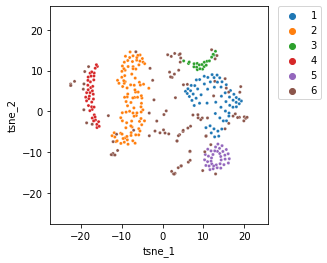

In [72]:
# Plot the result of our TSNE with the label color coded
# A lot of the stuff here is about making the plot look pretty and not TSNE
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'class': y[:,0]})
fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='class', data=tsne_result_df, ax=ax,s=10, palette=sns.color_palette(n_colors=6))
lim = (tsne_result.min()-5, tsne_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
plt.show()

<a id="6"></a>
## References

t-distributed Neighbor Stochastic Embedding:

- [t-SNE Python Example](https://towardsdatascience.com/t-sne-python-example-1ded9953f26)
- [tSNE con Python, una introducción](https://sitiobigdata.com/2019/10/27/una-introduccion-a-tsne-con-python)
- [Comprehensive Guide on t-SNE algorithm with implementation in R & Python](https://www.analyticsvidhya.com/blog/2017/01/t-sne-implementation-r-python/)
- [Visualizing Data using t-SNE](https://jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf)
- [Introduction to t-SNE in Python with scikit-learn](https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/)
- [t-SNE and UMAP projections in Python](https://plotly.com/python/t-sne-and-umap-projections/)
- [sklearn.manifold.TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)